In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(path_to_csv + "/SONY.csv")

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,45.860001,45.959999,45.330002,45.560001,45.560001,2192700
1,2017-12-04,46.250000,46.340000,45.750000,45.779999,45.779999,992800
2,2017-12-05,45.759998,46.200001,45.730000,45.869999,45.869999,554900
3,2017-12-06,44.990002,45.009998,44.650002,44.910000,44.910000,970700
4,2017-12-07,45.209999,45.849998,45.209999,45.750000,45.750000,809200


In [6]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [7]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
train_data

,Close
0,45.560001
1,45.779999
2,45.869999
3,44.910000
4,45.750000
...,...
963,110.580002
964,109.510002
965,106.970001
966,106.709999


In [9]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data["Close"])

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [11]:
model = SimpleExpSmoothing(train_data, initialization_method="estimated").fit()

In [12]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [13]:
y_pred = model.forecast(len(x_test))

In [14]:
y_pred

968     105.624155
969     105.624155
970     105.624155
971     105.624155
972     105.624155
           ...    
1239    105.624155
1240    105.624155
1241    105.624155
1242    105.624155
1243    105.624155
Length: 276, dtype: float64

In [15]:
y_pred_val = model.forecast(len(x_val))

In [16]:
y_pred_val

968     105.624155
969     105.624155
970     105.624155
971     105.624155
972     105.624155
           ...    
1103    105.624155
1104    105.624155
1105    105.624155
1106    105.624155
1107    105.624155
Length: 140, dtype: float64

In [17]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

y_next_30_days = model.forecast(len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
968    105.624155
969    105.624155
970    105.624155
971    105.624155
972    105.624155
973    105.624155
974    105.624155
975    105.624155
976    105.624155
977    105.624155
978    105.624155
979    105.624155
980    105.624155
981    105.624155
982    105.624155
983    105.624155
984    105.624155
985    105.624155
986    105.624155
987    105.624155
988    105.624155
989    105.624155
990    105.624155
991    105.624155
992    105.624155
993    105.624155
994    105.624155
995    105.624155
996    105.624155
997    105.624155
dtype: float64


In [18]:
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Validation RMSE:', valid_rmse)

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Validation RMSE: 19.53770559207746
Testing RMSE: 21.157637733538166


In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

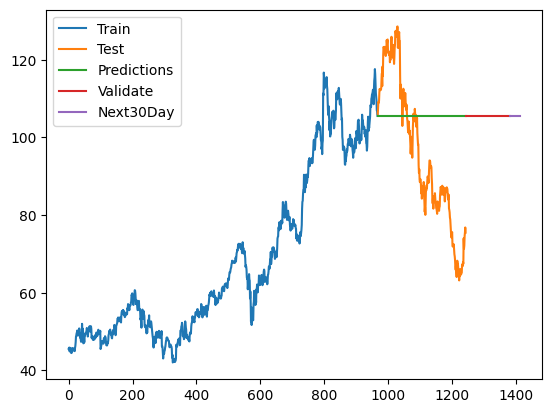

In [20]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()